# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
import ast
import matplotlib.patches as patches
import random
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [23]:
# read all our runs results
sims_files = []
sims_list , sims_files = os.listdir('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/') , [] 
for file in sims_list:                                                                                        
    print 'adding ',file
    sims_files.append(pd.read_csv(('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/'+file)))

sims_all=pd.concat(sims_files)  
print 'len:',len(sims_all) 

adding  runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1400000to1500000_results.csv
adding  runs1500000to1501000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1501000to1502000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1502000to1503000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1503000to1504000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1504000to1505000_NsigmaT_1_NSigmaZa1_1000_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs1505000to1506000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1000_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs150

In [3]:
nominal_values=dict({'SigmaT_C12':0.167,'SigmaT_err_C12':0.006,              
                     'a1_C12':0.143,'a1_err_C12':0.075,'a2_C12':0.158,'a2_err_C12':0.009,                
                     'b1_C12':0.562,'b1_err_C12':0.078,'b2_C12':0.159,'b2_err_C12':0.009})
chosen_values=dict({'SigmaT':0.155,'SigmaT_err':0.01,      
                     'a1':0.4,'a1_err':0.2,'a2':0.2,'a2_err':0.2, 
                     'b1':0.3,'b1_err':0.2,'b2':0.2,'b2_err':0.2})

In [26]:
print chosen_values['a1']-chosen_values['a1_err'] , chosen_values['a1']+chosen_values['a1_err']
print chosen_values['a2']-chosen_values['a2_err'] , chosen_values['a2']+chosen_values['a2_err']

sims_chosen=sims_all[(chosen_values['a1']-chosen_values['a1_err']<=sims_all.genSigmaZa1) & (sims_all.genSigmaZa1<=chosen_values['a1']+chosen_values['a1_err'])]
sims_chosen=sims_chosen[(chosen_values['a2']-chosen_values['a2_err']<=sims_chosen.genSigmaZa2) & (sims_chosen.genSigmaZa2<=chosen_values['a2']+chosen_values['a2_err'])]
sims_chosen=sims_chosen[(chosen_values['b1']-chosen_values['b1_err']<=sims_chosen.genMeanZa1) & (sims_chosen.genMeanZa1<=chosen_values['b1']+chosen_values['b1_err'])]
sims_chosen=sims_chosen[(chosen_values['b2']-chosen_values['b2_err']<=sims_chosen.genMeanZa2) & (sims_chosen.genMeanZa2<=chosen_values['b2']+chosen_values['b2_err'])]
sims_chosen

0.2 0.6
0.0 0.4


,KS3dHistPval,KSPval_tot,KStPval,KSxPval,KSyPval,KSzPval,NLostEvents,NentriesSimRun,PvalMeanZa1MeanZa2_12C,PvalMeanZa1MeanZa2_208Pb,...,recSigmaZ_unweighted_pmiss_0.450_0.550,recSigmaZ_unweighted_pmiss_0.550_0.650,recSigmaZ_unweighted_pmiss_0.650_0.750,recSigmaZ_unweighted_pmiss_0.750_1.000,recSigmaZa1_unweighted,recSigmaZa1_weighted,recSigmaZa2_unweighted,recSigmaZa2_weighted,run,time
1178,NaN,1.999570e-10,1.212160e-70,9.064160e-14,1.999570e-10,7.944840e-31,62224.0,36846,6.044890e-03,4.479890e-03,...,0.113105,0.143141,0.175176,0.222502,0.294628,0.340928,0.143084,0.149512,1014514,2017January15
1179,NaN,5.981470e-10,3.907830e-68,1.820300e-13,5.981470e-10,2.077180e-11,75151.0,23919,2.650620e-02,1.947420e-02,...,0.098850,0.130036,0.164077,0.212751,0.293744,0.297321,0.131957,0.133020,1014515,2017January15
1180,NaN,4.290790e-13,6.152880e-65,3.259940e-13,3.319740e-10,3.919920e-05,84029.0,15041,2.525490e-04,2.291300e-02,...,0.096398,0.121589,0.150850,0.198037,0.241349,0.263230,0.127182,0.127119,1014516,2017January15
1181,NaN,1.742020e-09,1.167400e-62,1.379210e-12,1.742020e-09,7.634240e-14,90203.0,8867,9.951520e-02,6.779100e-05,...,0.113424,0.114299,0.141569,0.200677,0.051431,0.128021,0.151611,0.151839,1014517,2017January15
1182,NaN,1.590450e-09,2.627090e-56,1.335560e-12,1.590450e-09,1.487990e-35,93646.0,5424,3.043730e-04,6.519910e-07,...,0.234685,0.165204,0.153691,0.184062,-0.263192,-0.212863,0.212715,0.202369,1014518,2017January15
1188,NaN,7.603030e-10,1.014660e-66,1.888770e-13,7.603030e-10,2.427930e-12,73669.0,25401,5.746400e-10,7.312750e-02,...,0.100101,0.128661,0.159946,0.202362,0.267429,0.257832,0.129791,0.127737,1014524,2017January15
1189,NaN,6.117370e-13,1.020830e-63,3.225160e-13,8.013470e-10,2.341170e-05,83717.0,15353,1.946470e-03,1.137000e-01,...,0.091529,0.118406,0.145013,0.188564,0.241123,0.262684,0.120440,0.119421,1014525,2017January15
1190,NaN,5.300080e-09,3.489160e-59,9.243720e-13,5.300080e-09,2.212200e-12,90146.0,8924,1.964480e-01,3.254830e-04,...,0.114168,0.130622,0.145672,0.206082,0.148015,0.217688,0.145305,0.153912,1014526,2017January15
1191,NaN,3.201860e-08,4.945210e-56,1.026350e-12,3.201860e-08,2.181110e-32,93974.0,5096,7.537640e-05,9.173730e-04,...,0.228233,0.169151,0.174556,0.210128,-0.202548,0.026332,0.221519,0.182460,1014527,2017January15
1192,NaN,1.371050e-07,3.082220e-47,5.123930e-11,1.371050e-07,5.490230e-70,95586.0,3484,NaN,NaN,...,0.384398,0.324864,0.275730,0.214999,-0.010169,0.004699,0.272219,0.239782,1014528,2017January15


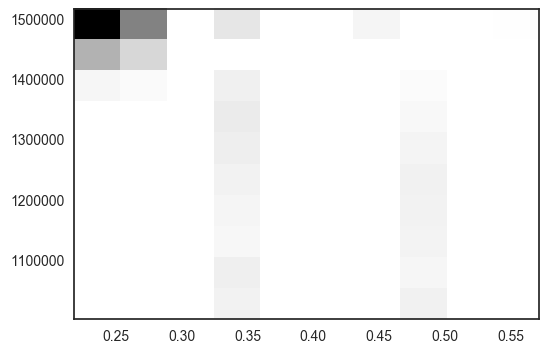

In [34]:
plt.hist2d(sims_chosen.genSigmaZa1,sims_chosen.run,weights=sims_chosen.PvalSigmaZa1_unweighted_12C);

In [9]:
sims=sims[(chosen_values['a1']-chosen_values['a1_err']<=sims.genSigmaZa1) & (sims.genSigmaZa1<=chosen_values['a1']+chosen_values['a1_err'])]
sims=sims[(chosen_values['a2']-chosen_values['a2_err']<=sims.genSigmaZa2) & (sims.genSigmaZa2<=chosen_values['a2']+chosen_values['a2_err'])]
sims=sims[(chosen_values['b1']-chosen_values['b1_err']<=sims.genMeanZa1) & (sims.genMeanZa1<=chosen_values['b1']+chosen_values['b1_err'])]
sims=sims[(chosen_values['b2']-chosen_values['b2_err']<=sims.genMeanZa2) & (sims.genMeanZa2<=chosen_values['b2']+chosen_values['b2_err'])]
sims

,Unnamed: 0,KSPval_tot,KStPval,KSxPval,KSyPval,KSzPval,NLostEvents,NentriesSimRun,fracLostEvents,genMeanX,...,fracLoss_pmiss_0.875_0.938,fracLoss_pmiss_0.875_0.938_Q2bin_0.0_1.5,fracLoss_pmiss_0.875_0.938_Q2bin_1.5_2.0,fracLoss_pmiss_0.875_0.938_Q2bin_2.0_2.5,fracLoss_pmiss_0.875_0.938_Q2bin_2.5_6.0,fracLoss_pmiss_0.938_1.000,fracLoss_pmiss_0.938_1.000_Q2bin_0.0_1.5,fracLoss_pmiss_0.938_1.000_Q2bin_1.5_2.0,fracLoss_pmiss_0.938_1.000_Q2bin_2.0_2.5,fracLoss_pmiss_0.938_1.000_Q2bin_2.5_6.0



tab completion not implemented for this context


In [4]:
def draw_single_parameter_gen_rec(sims=None,var='SigmaZa1',name='a1'):
    fig=plt.figure(figsize=(40,10))
    ax=fig.add_subplot(131)
    plt.scatter(sims[sims['rec'+var+'_unweighted']>-1]['gen'+var],sims[sims['rec'+var+'_unweighted']>-1]['rec'+var+'_unweighted']);
    ax.add_patch( patches.Rectangle((np.min(sims['gen'+var]),nominal_values[name+'_C12']-nominal_values[name+'_err_C12']),                                
                                    np.max(sims['gen'+var])-np.min(sims['gen'+var]),                                      
                                    2*nominal_values[name+'_err_C12'],                                 
                                    fill=False, linewidth=3 , color='blue'                               
                                   ))
    set_axes(ax,'gen '+name,'rec '+name,fontsize=25)
    ax=fig.add_subplot(132)
    x = sims['gen'+var]
    plt.hist([x,x,x,x,x],
             weights=[np.ones(len(sims)),sims['Pval'+var+'_unweighted_12C'],sims.PvalTotal_allPvals_12C,sims.PvalTotal_largePvals_12C,sims.PvalTotal_tw_12C],
             label=['none','Pval','global-Pval' , 'large-Pvals' , 'tweeked-Pvals'] ,
             normed=1);
    set_axes(ax,'gen '+name,'',fontsize=25)
    plt.legend(loc='best',fontsize=25)
    ax=fig.add_subplot(133)
    plt.hist(sims['gen'+var],weights=sims['Pval'+var+'_unweighted_12C']);
    set_axes(ax,'gen '+name,'',fontsize=25)

#     ax=fig.add_subplot(144)
#     plt.hist(sims['gen'+var],weights=sims['Pval'+var+'_tw_12C']);
#     set_axes(ax,'gen '+name,'',fontsize=25)


tab completion not implemented for this context


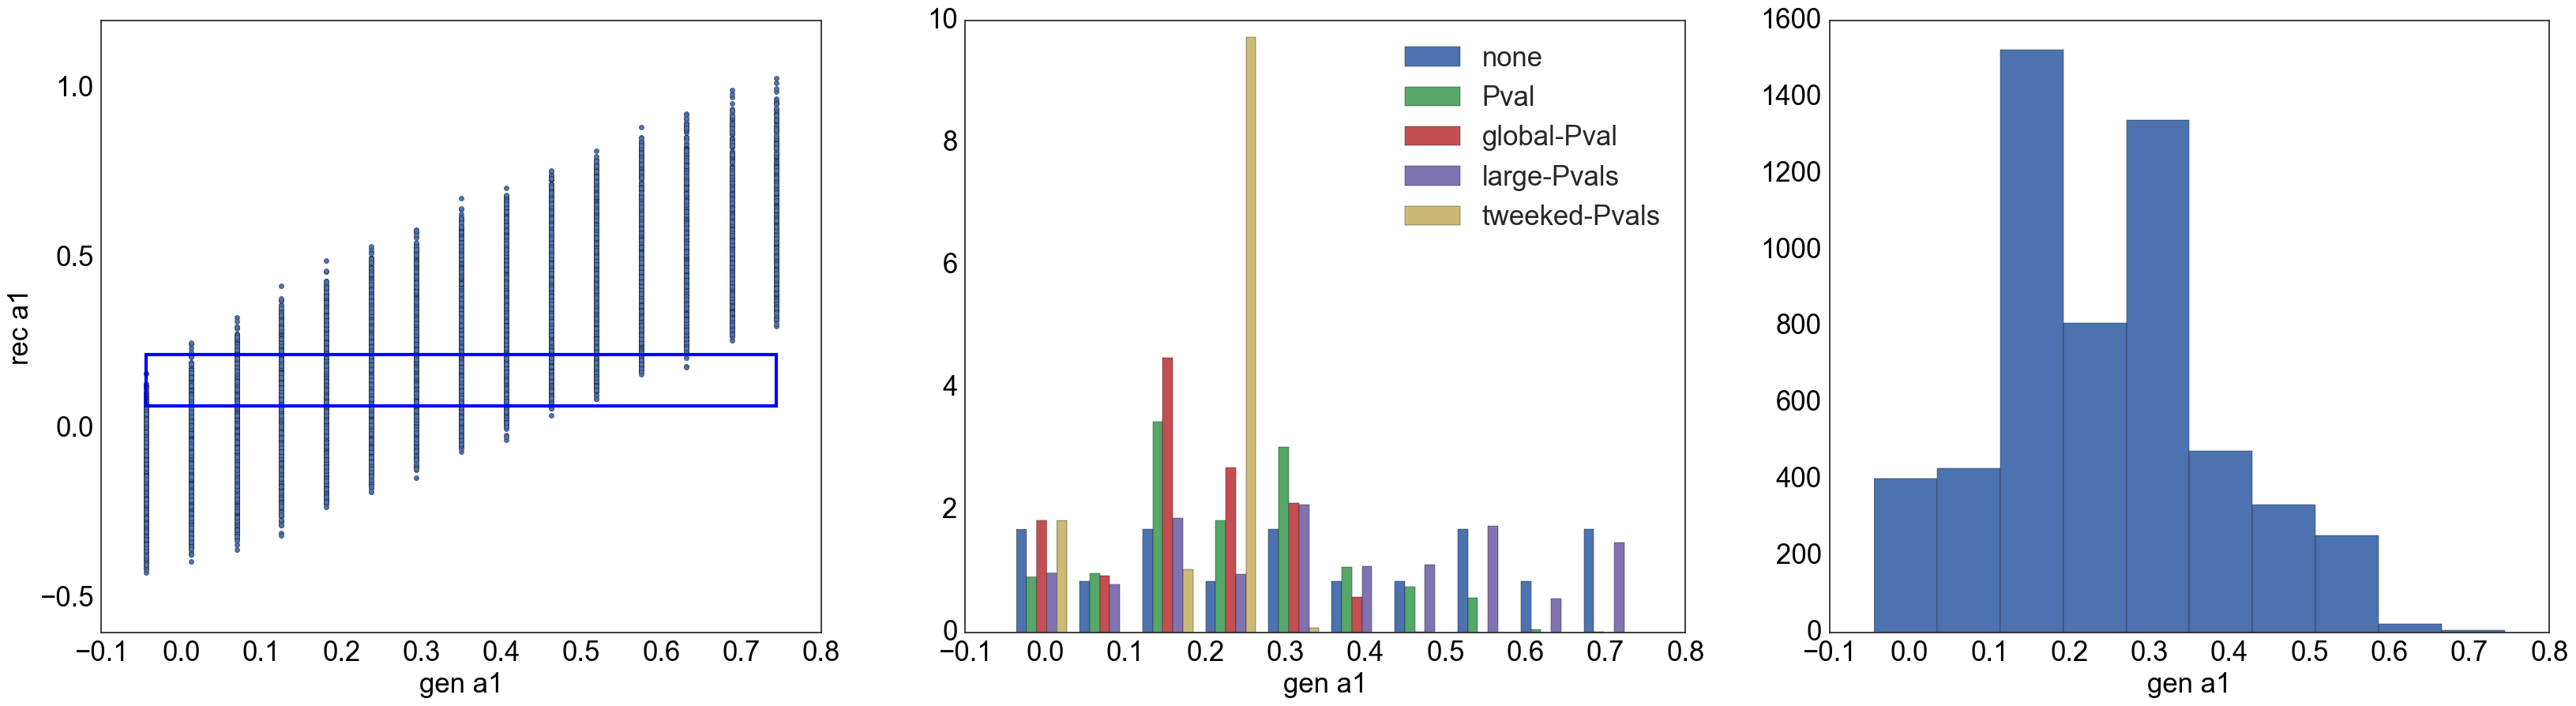

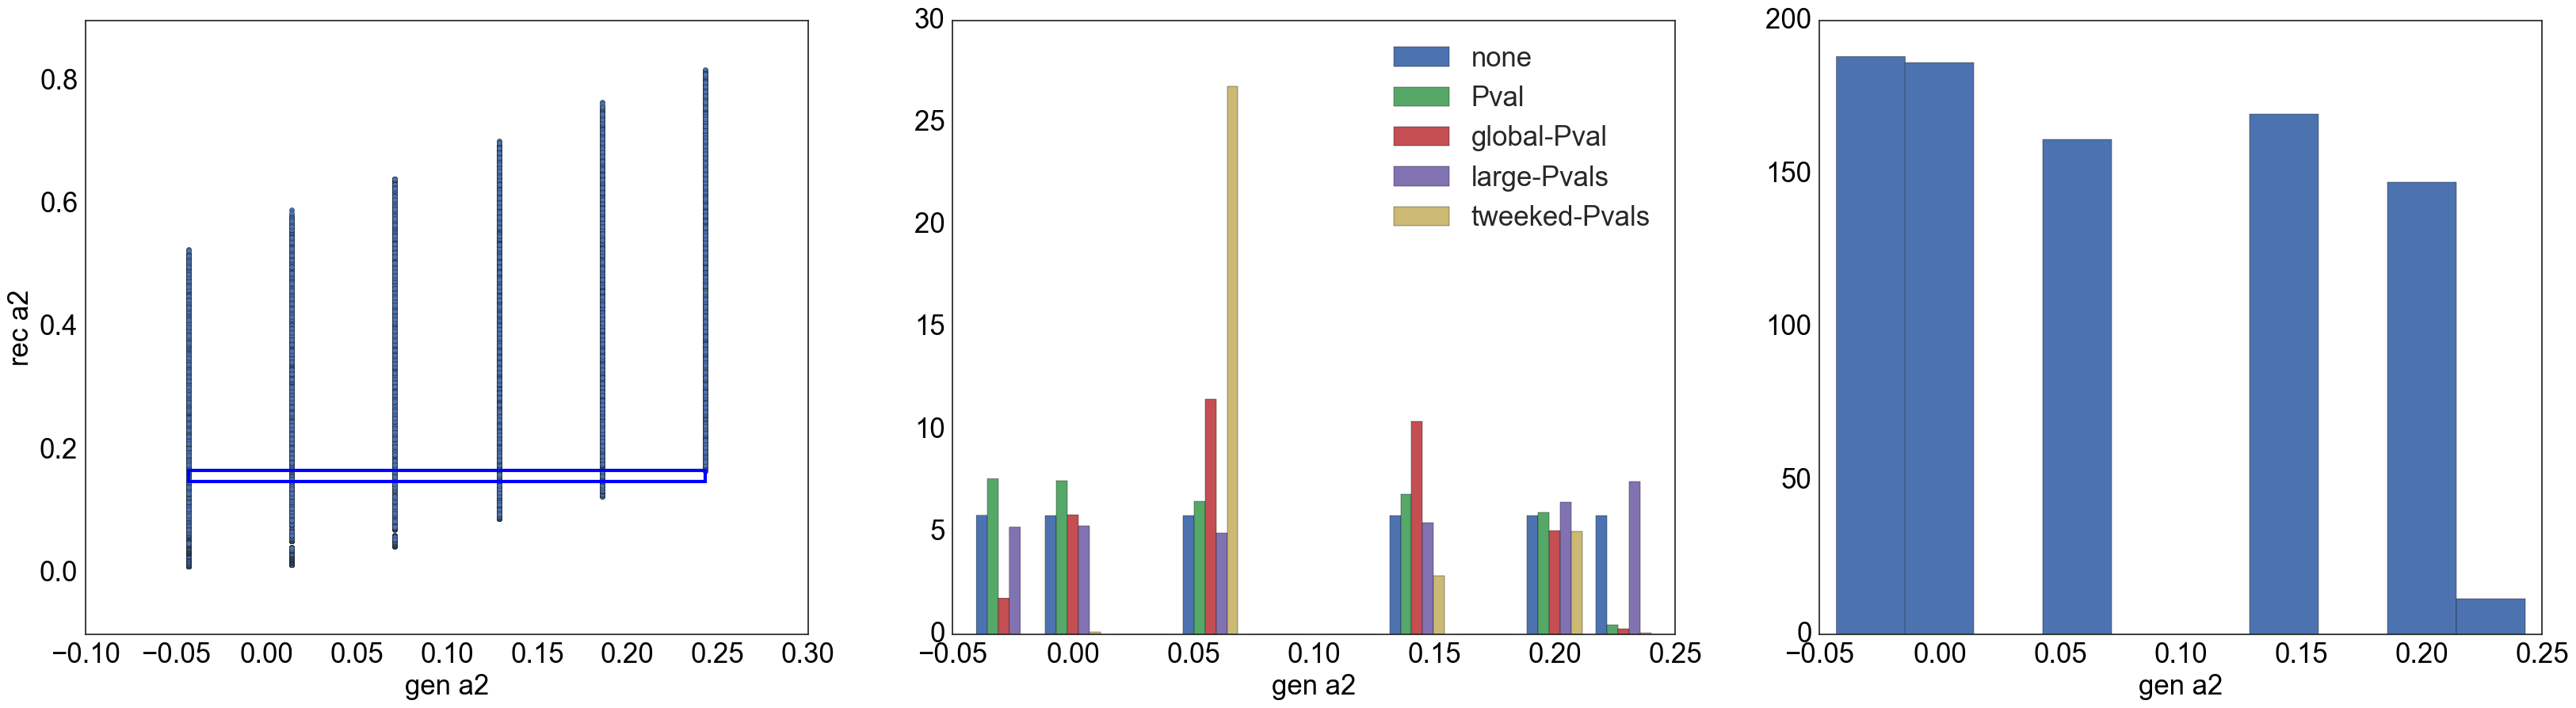

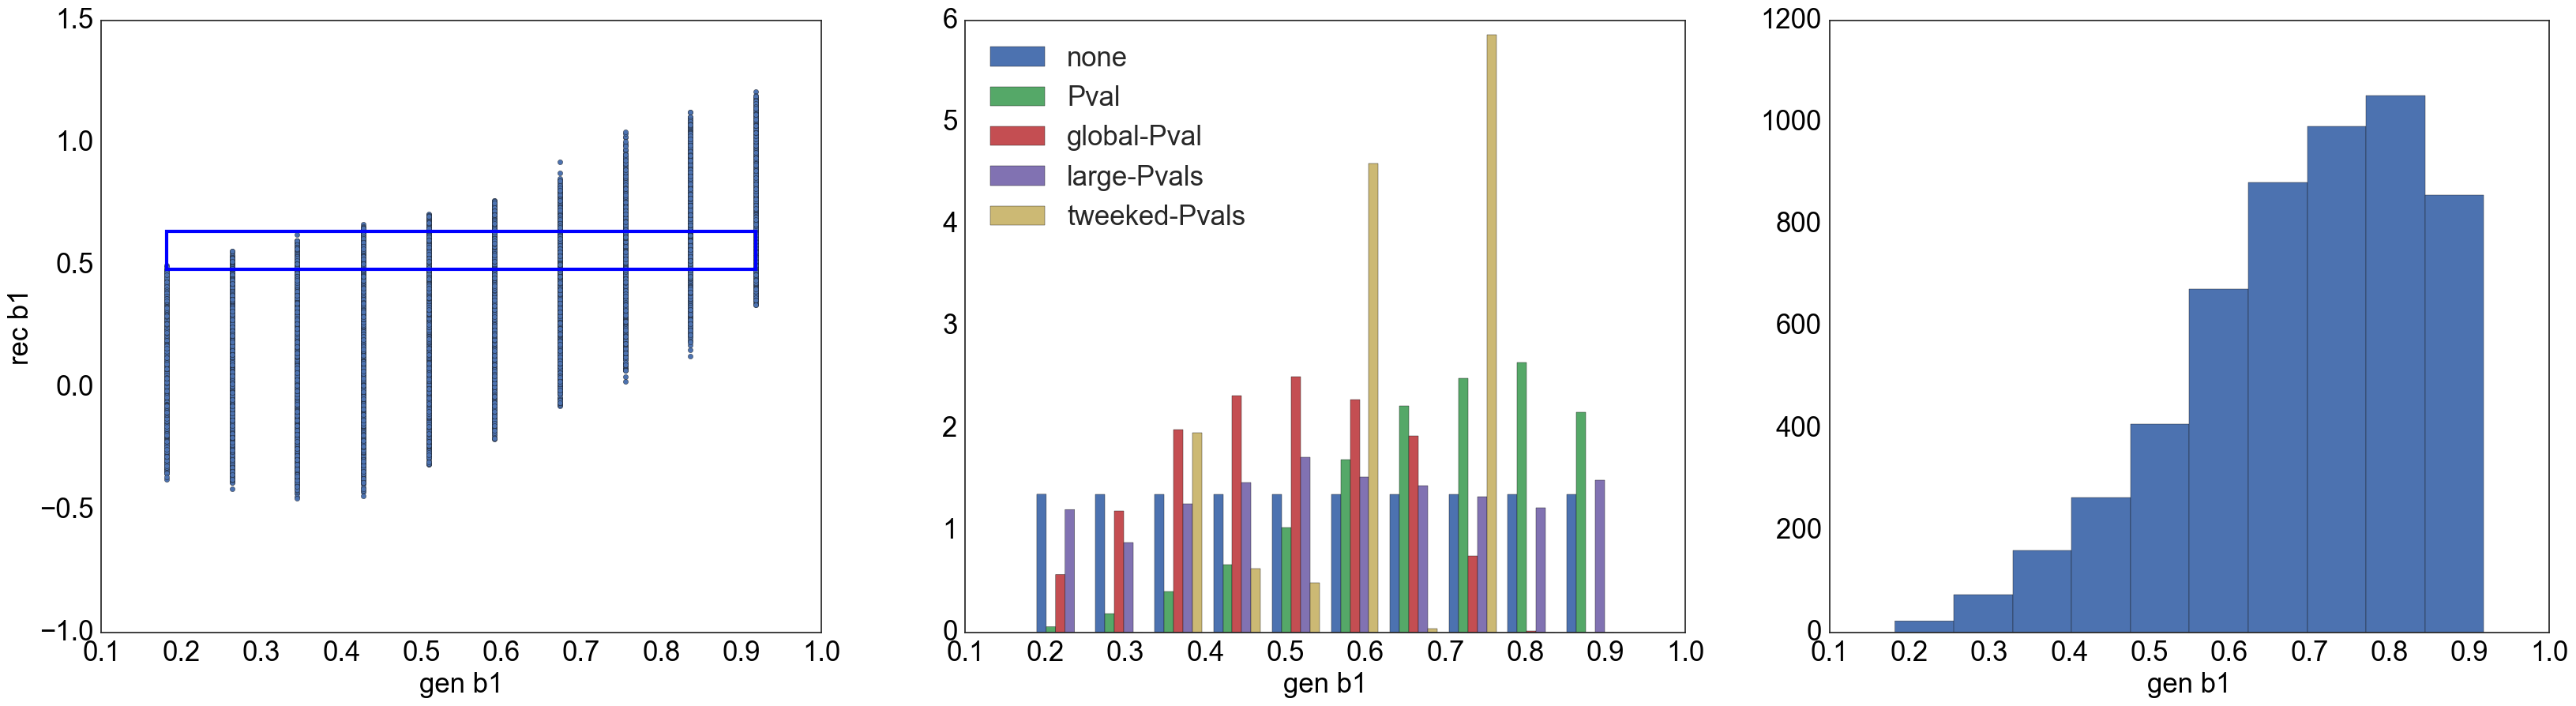

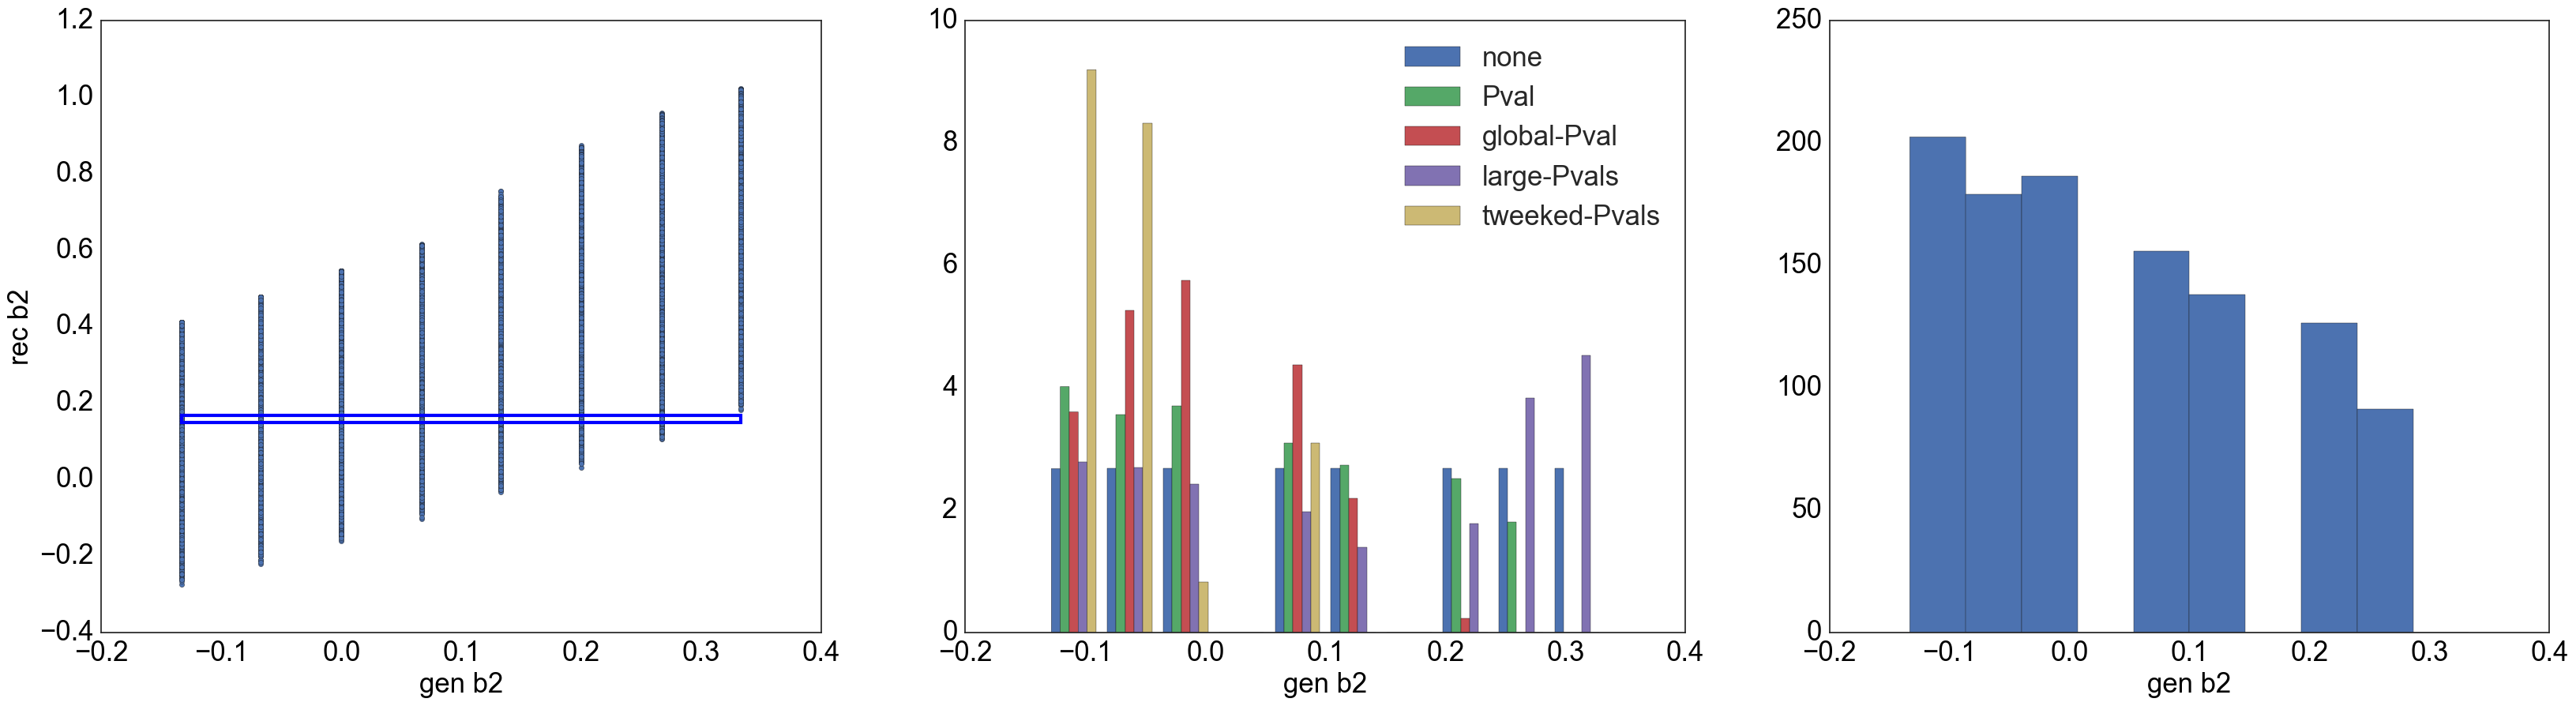

In [9]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1520000to1563200_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa1',name='a1')
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa2',name='a2')
draw_single_parameter_gen_rec(sims=sims,var='MeanZa1',name='b1')
draw_single_parameter_gen_rec(sims=sims,var='MeanZa2',name='b2')


tab completion not implemented for this context


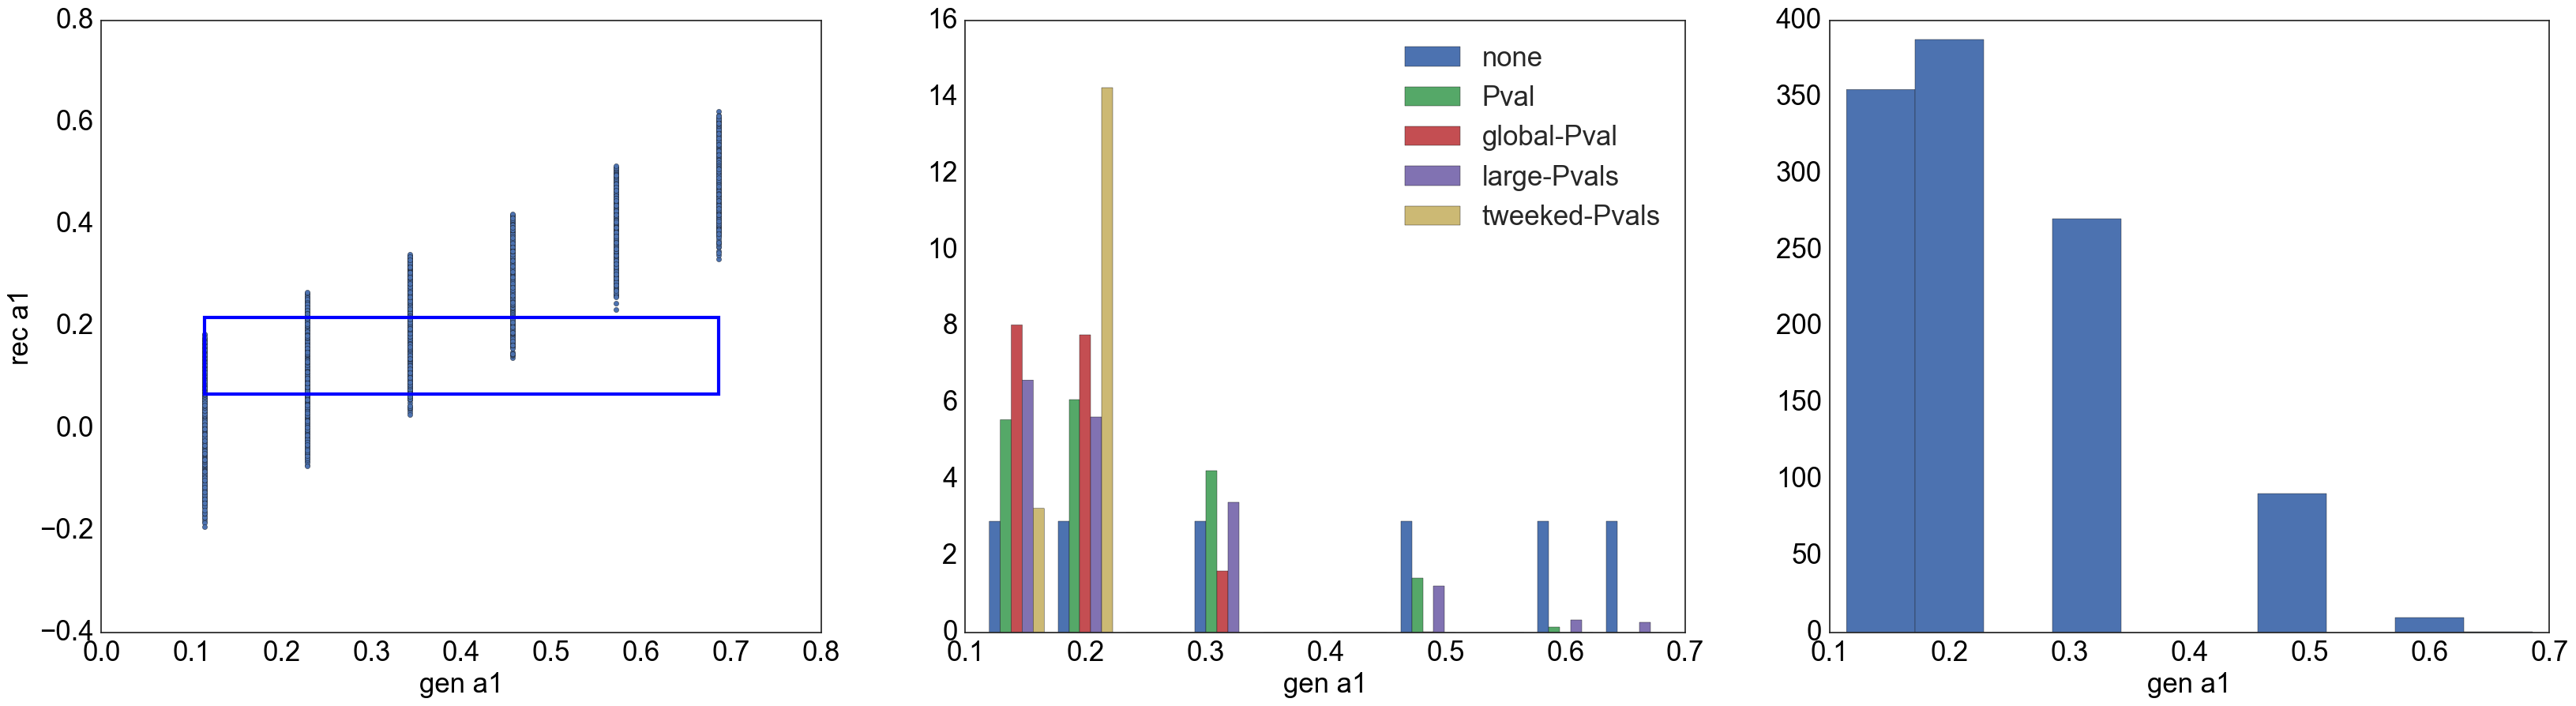

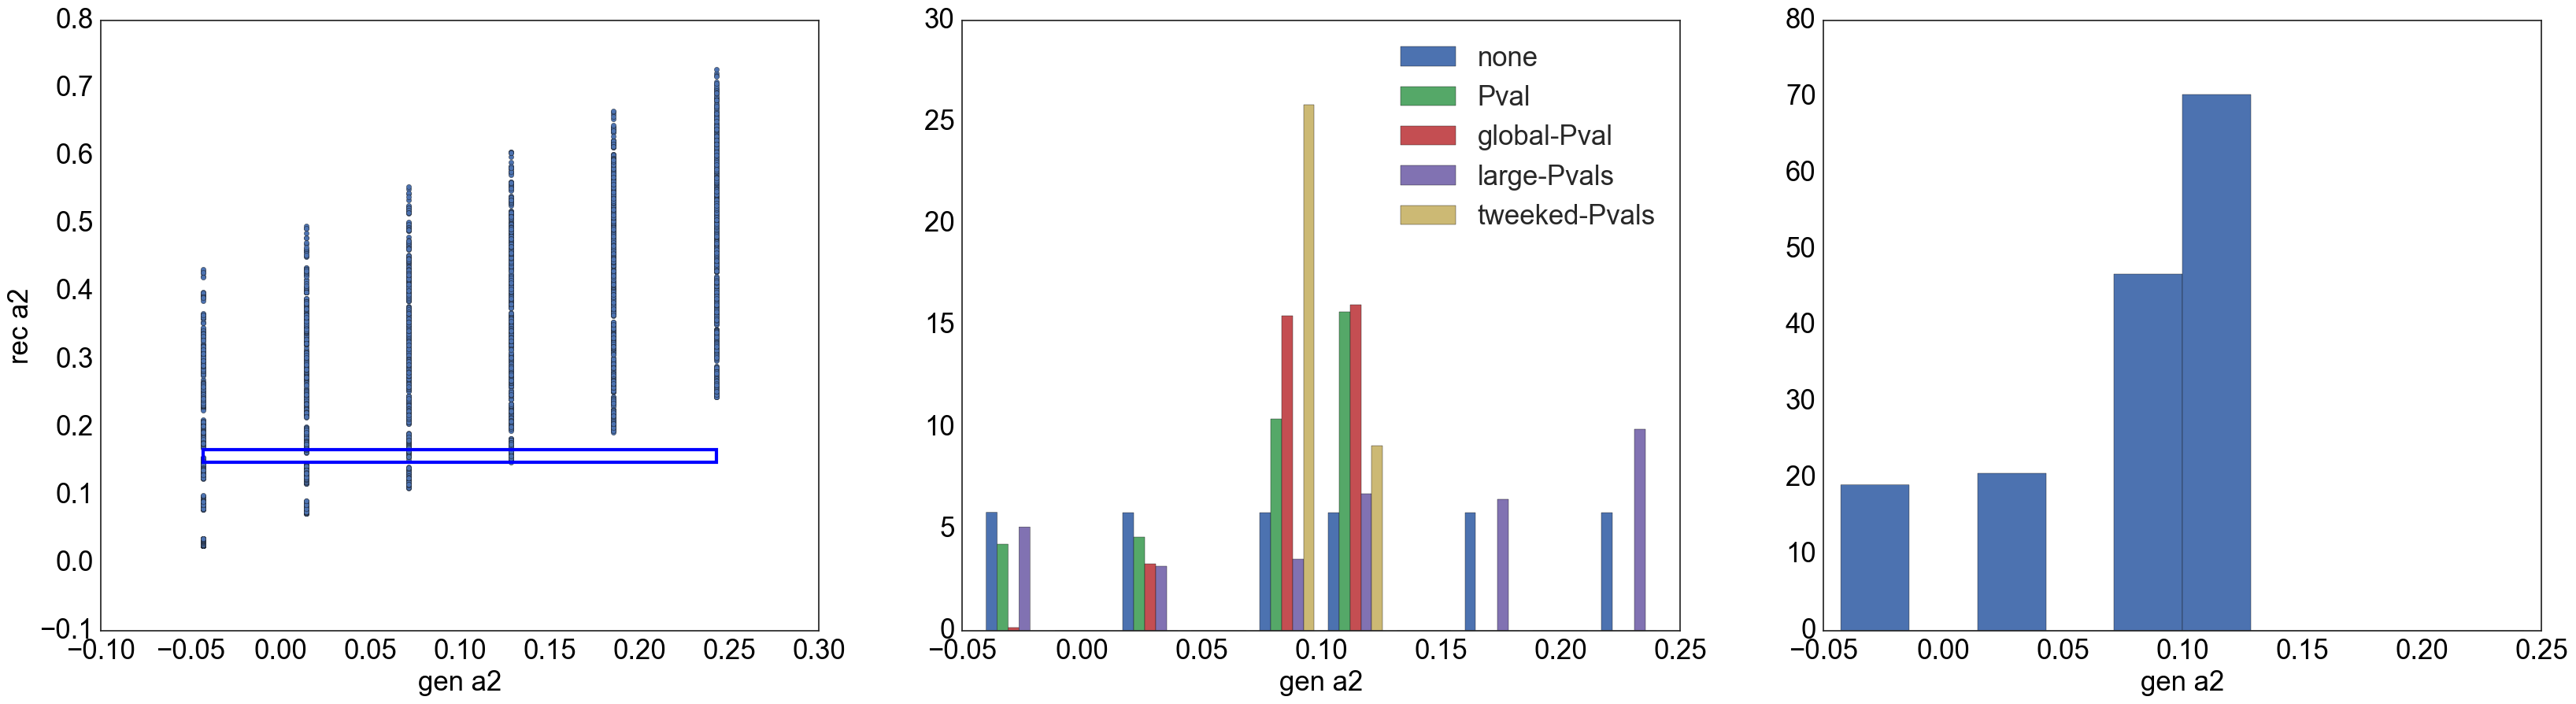

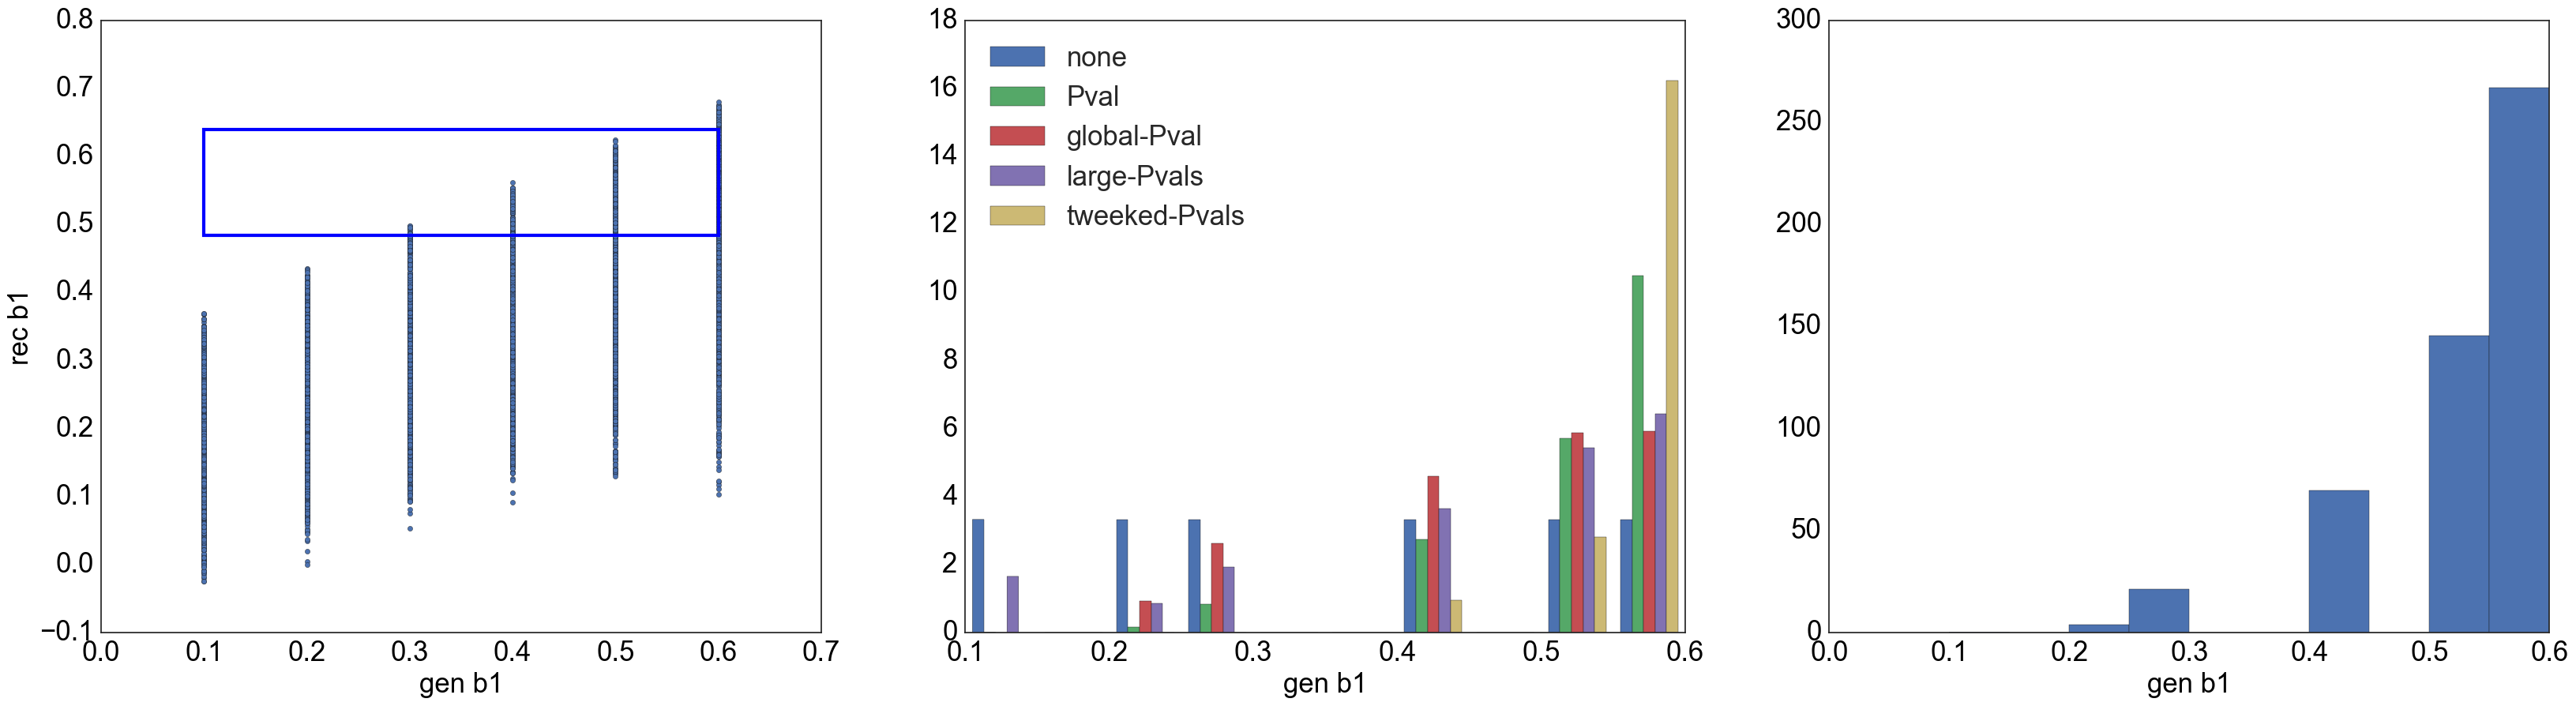

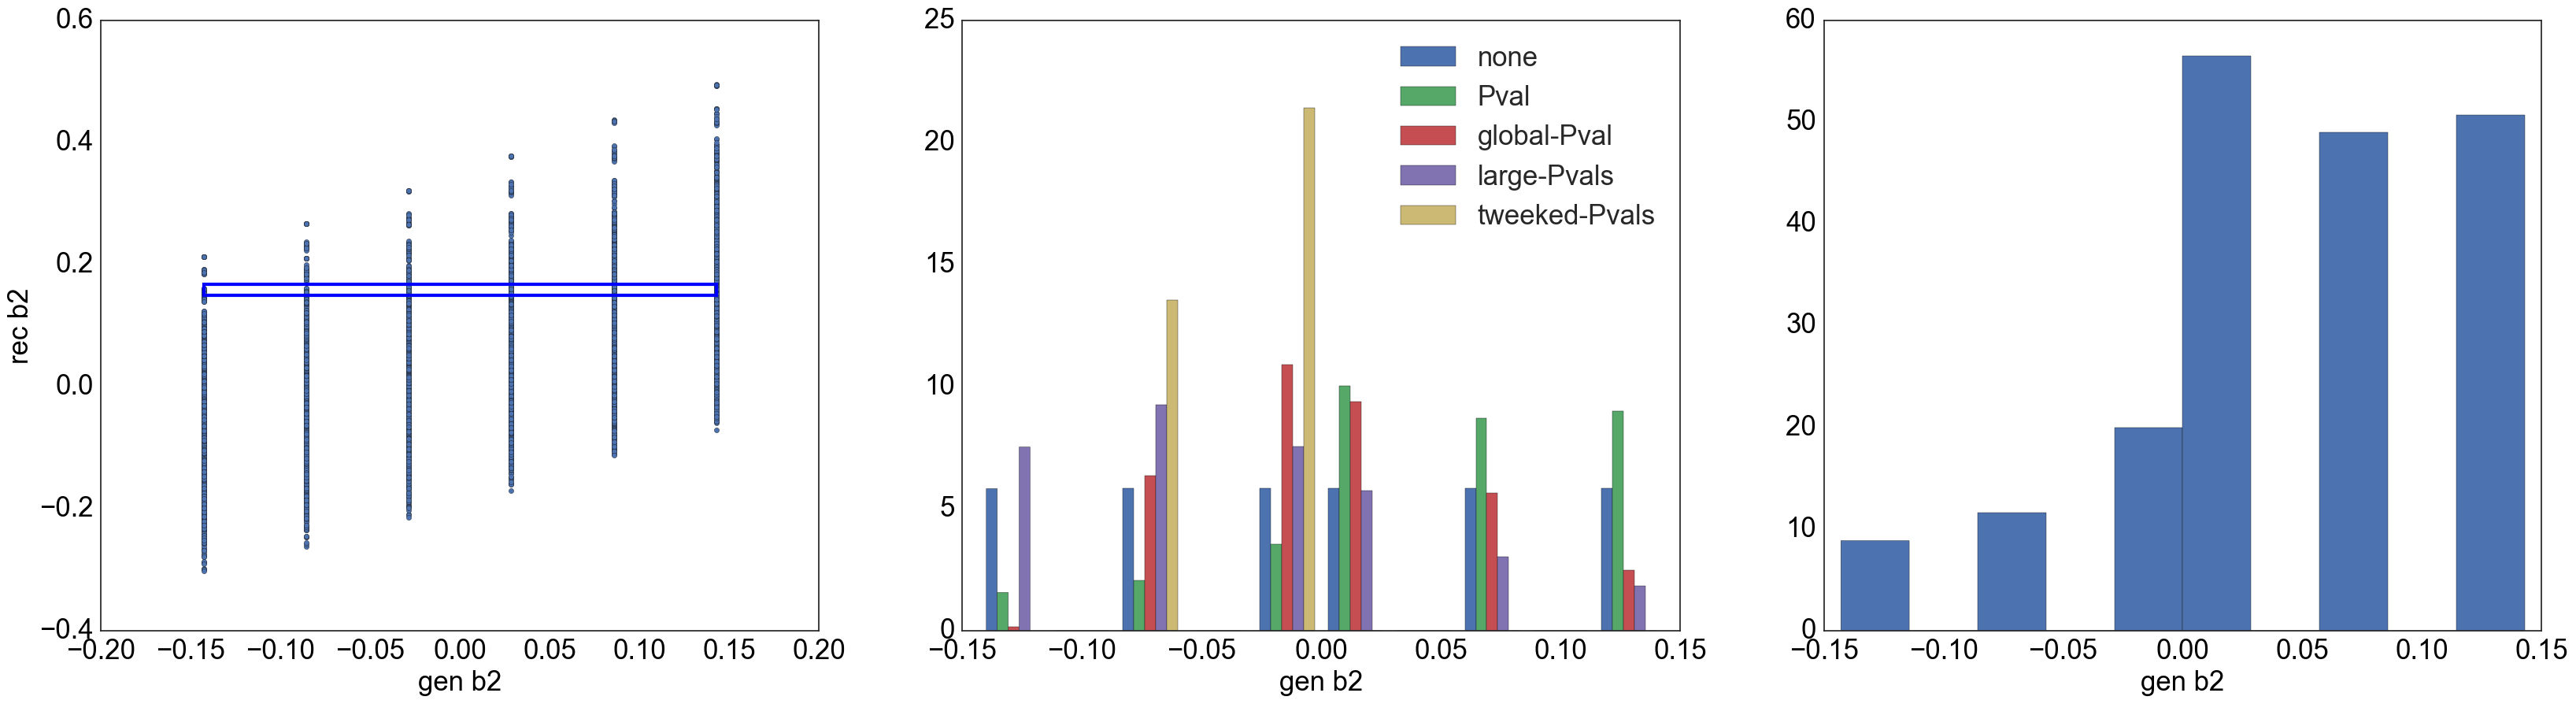

In [10]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1510000to1517776_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa1',name='a1')
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa2',name='a2')
draw_single_parameter_gen_rec(sims=sims,var='MeanZa1',name='b1')
draw_single_parameter_gen_rec(sims=sims,var='MeanZa2',name='b2')


tab completion not implemented for this context

variable "pd" not defined.

variable "pd.con" not defined.


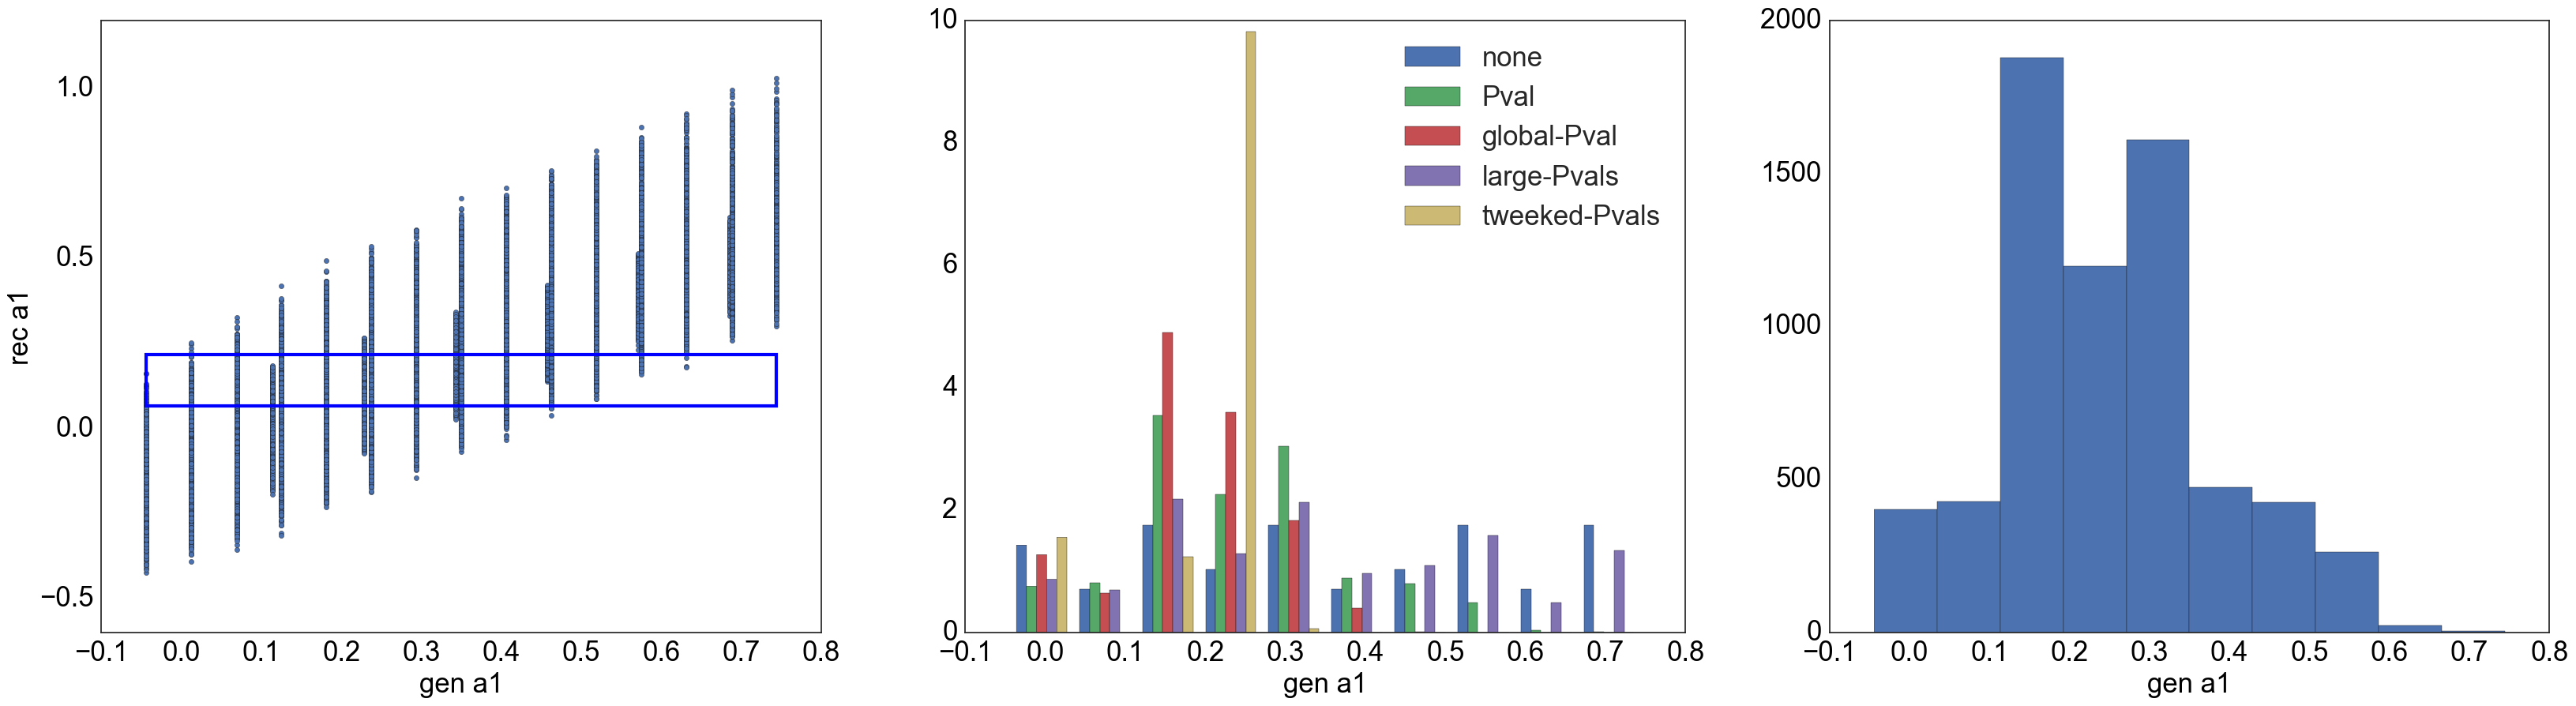

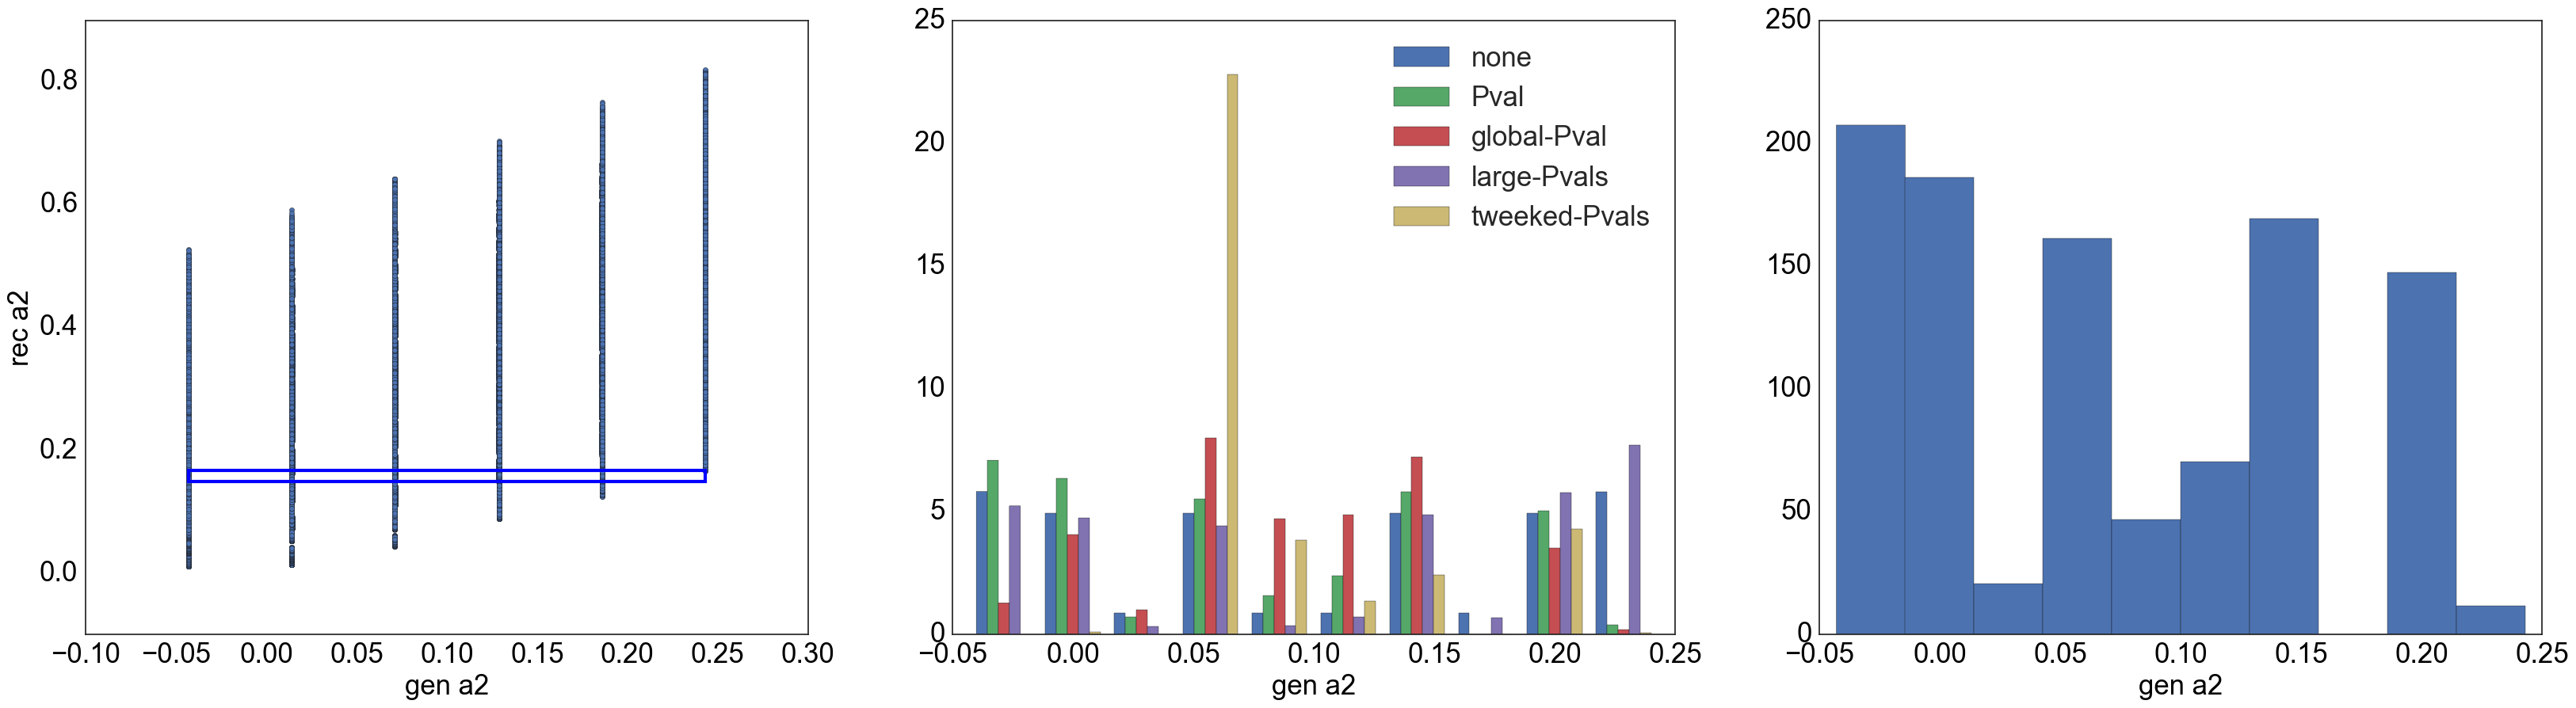

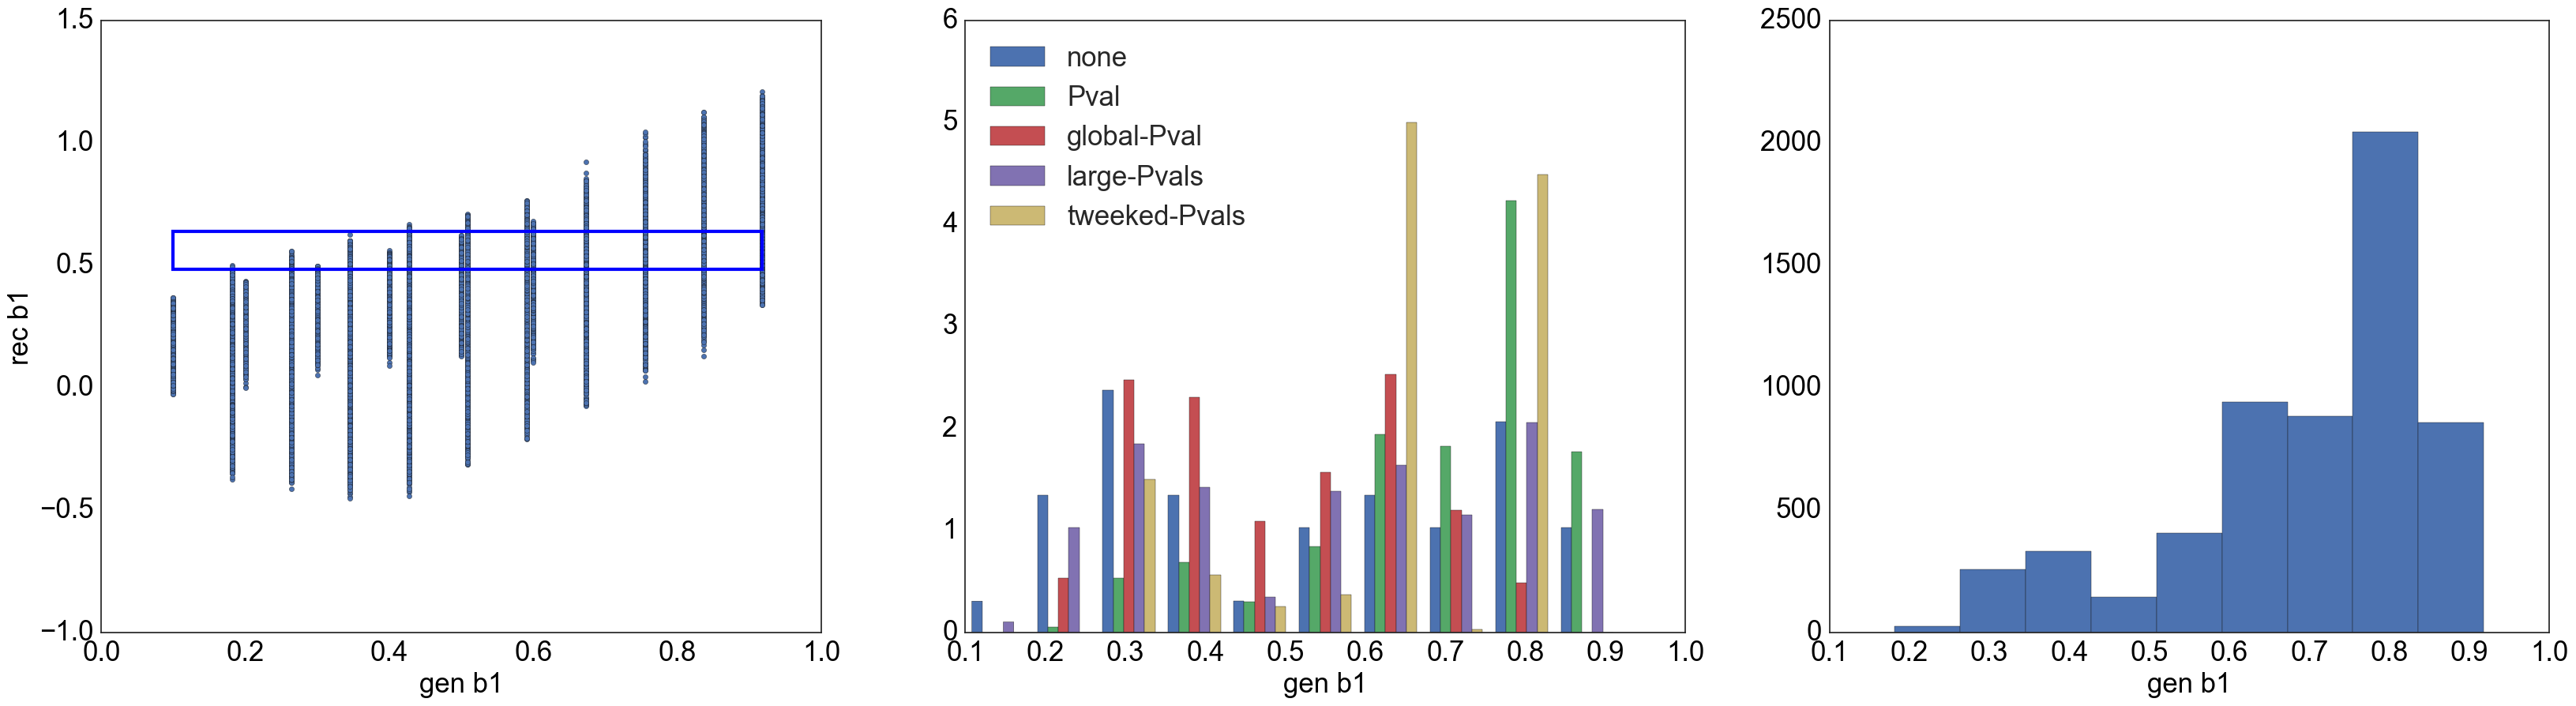

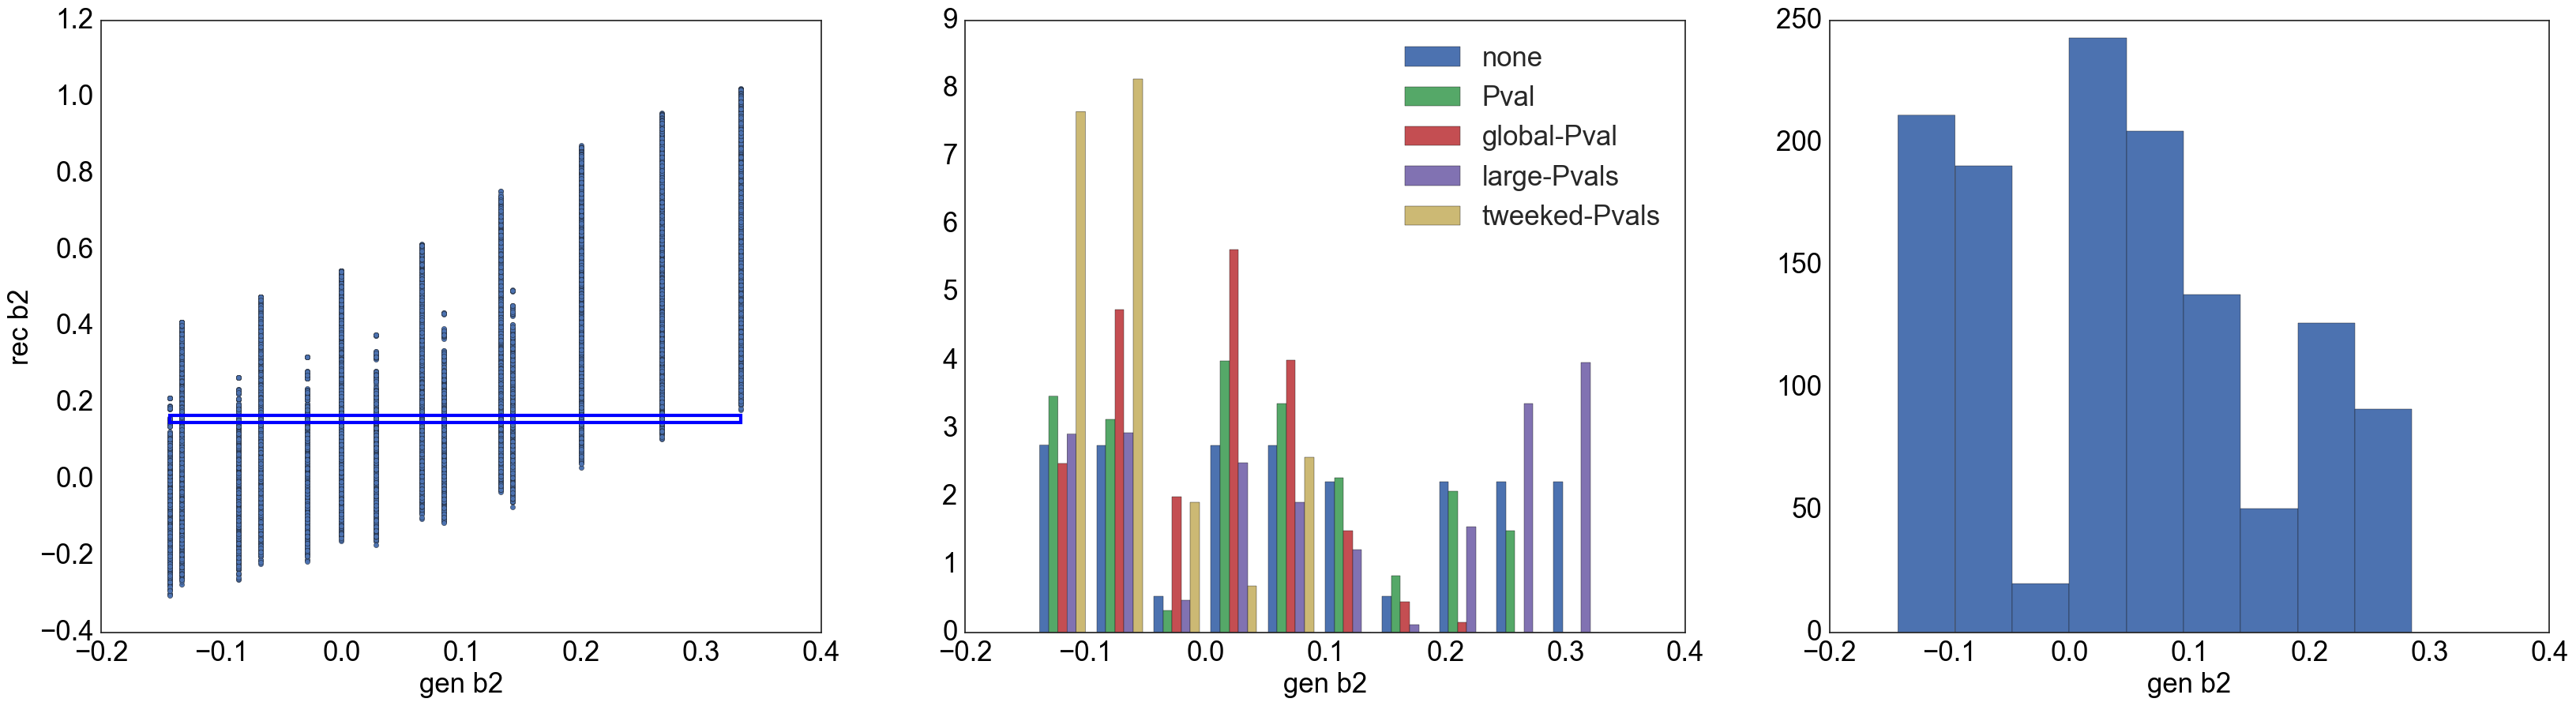

In [11]:
sims151 = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1510000to1517776_results.csv',na_values=0.0)
sims152 = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1520000to1563200_results.csv',na_values=0.0)
sims = pd.concat([sims151,sims152])
sims.fillna(0,inplace=True)
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa1',name='a1')
draw_single_parameter_gen_rec(sims=sims,var='SigmaZa2',name='a2')
draw_single_parameter_gen_rec(sims=sims,var='MeanZa1',name='b1')
draw_single_parameter_gen_rec(sims=sims,var='MeanZa2',name='b2')


tab completion not implemented for this context


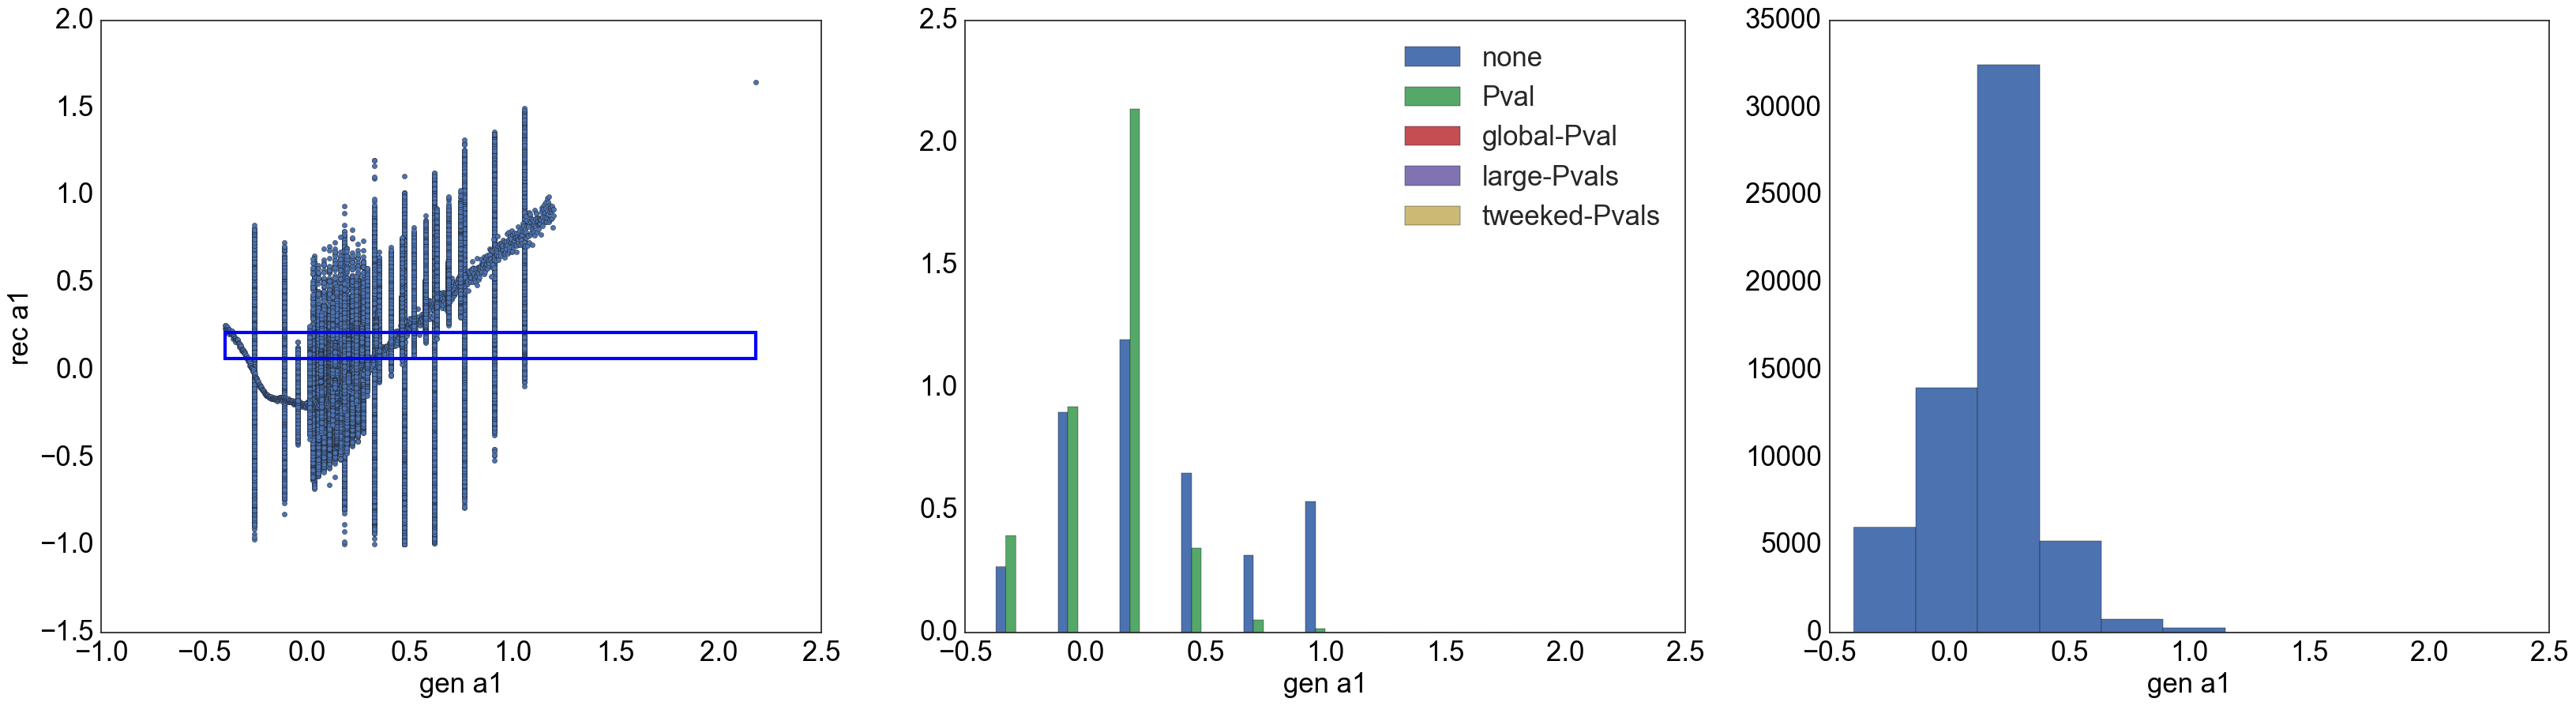

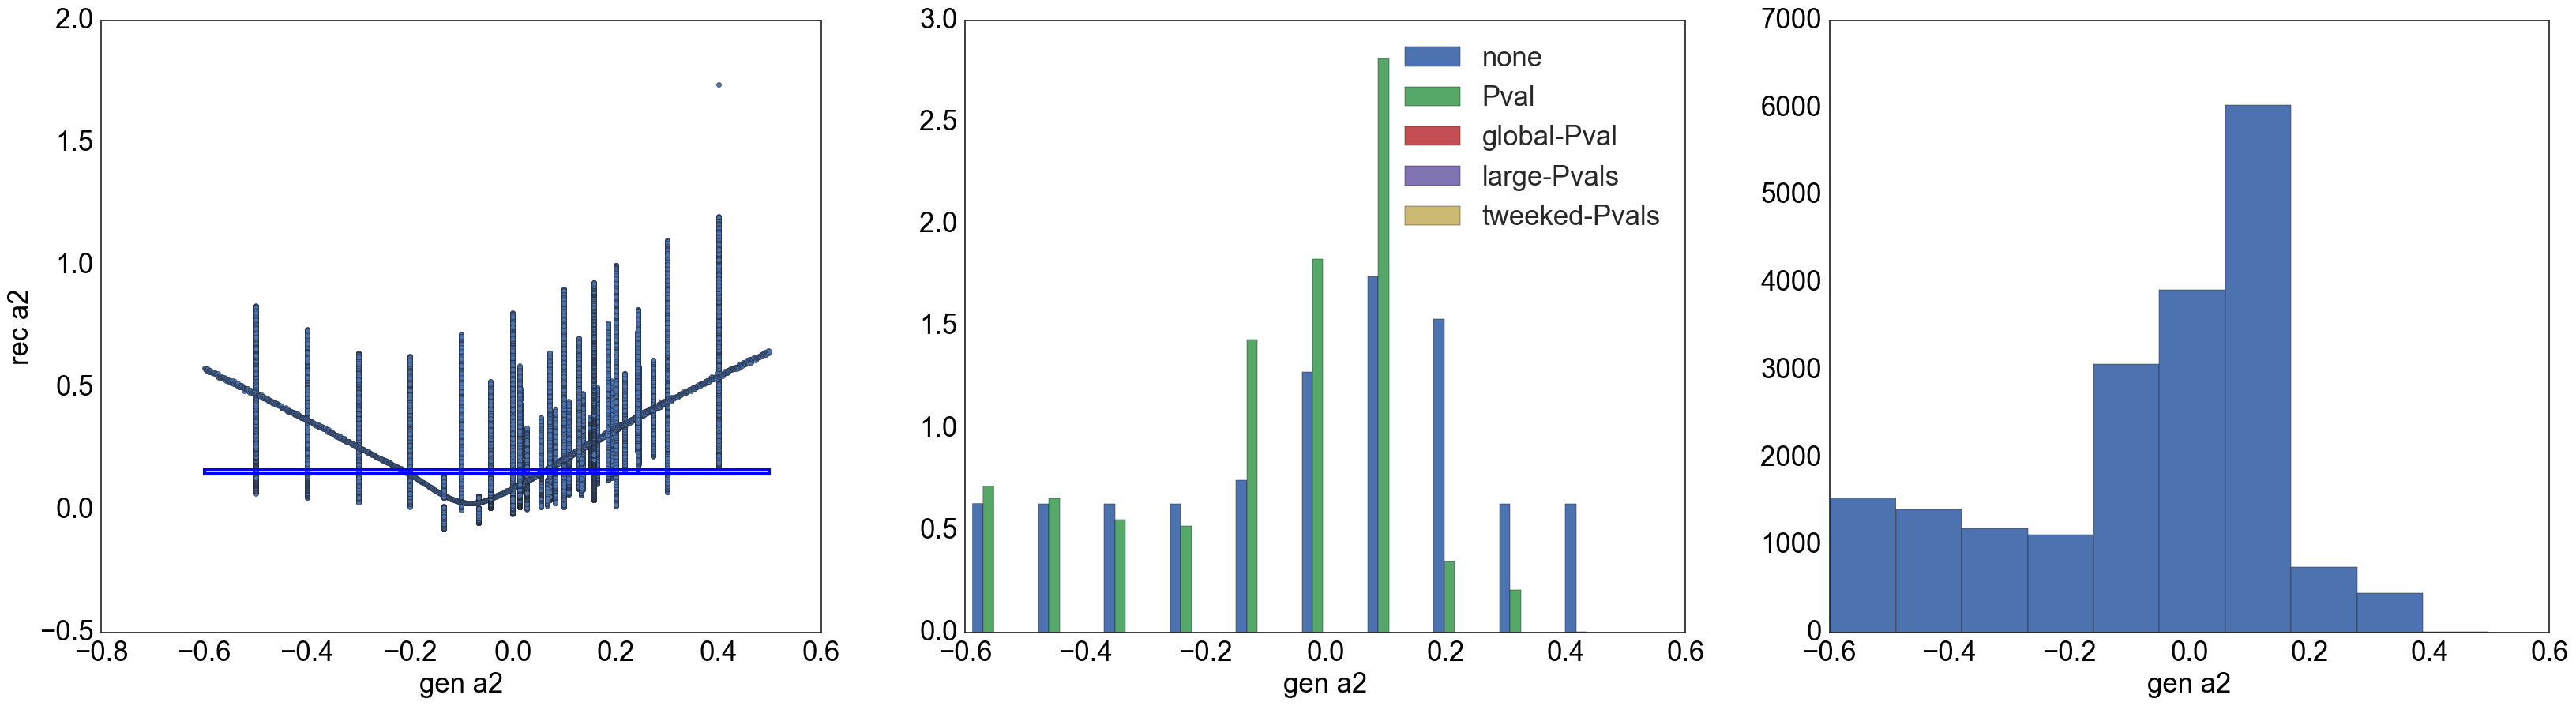

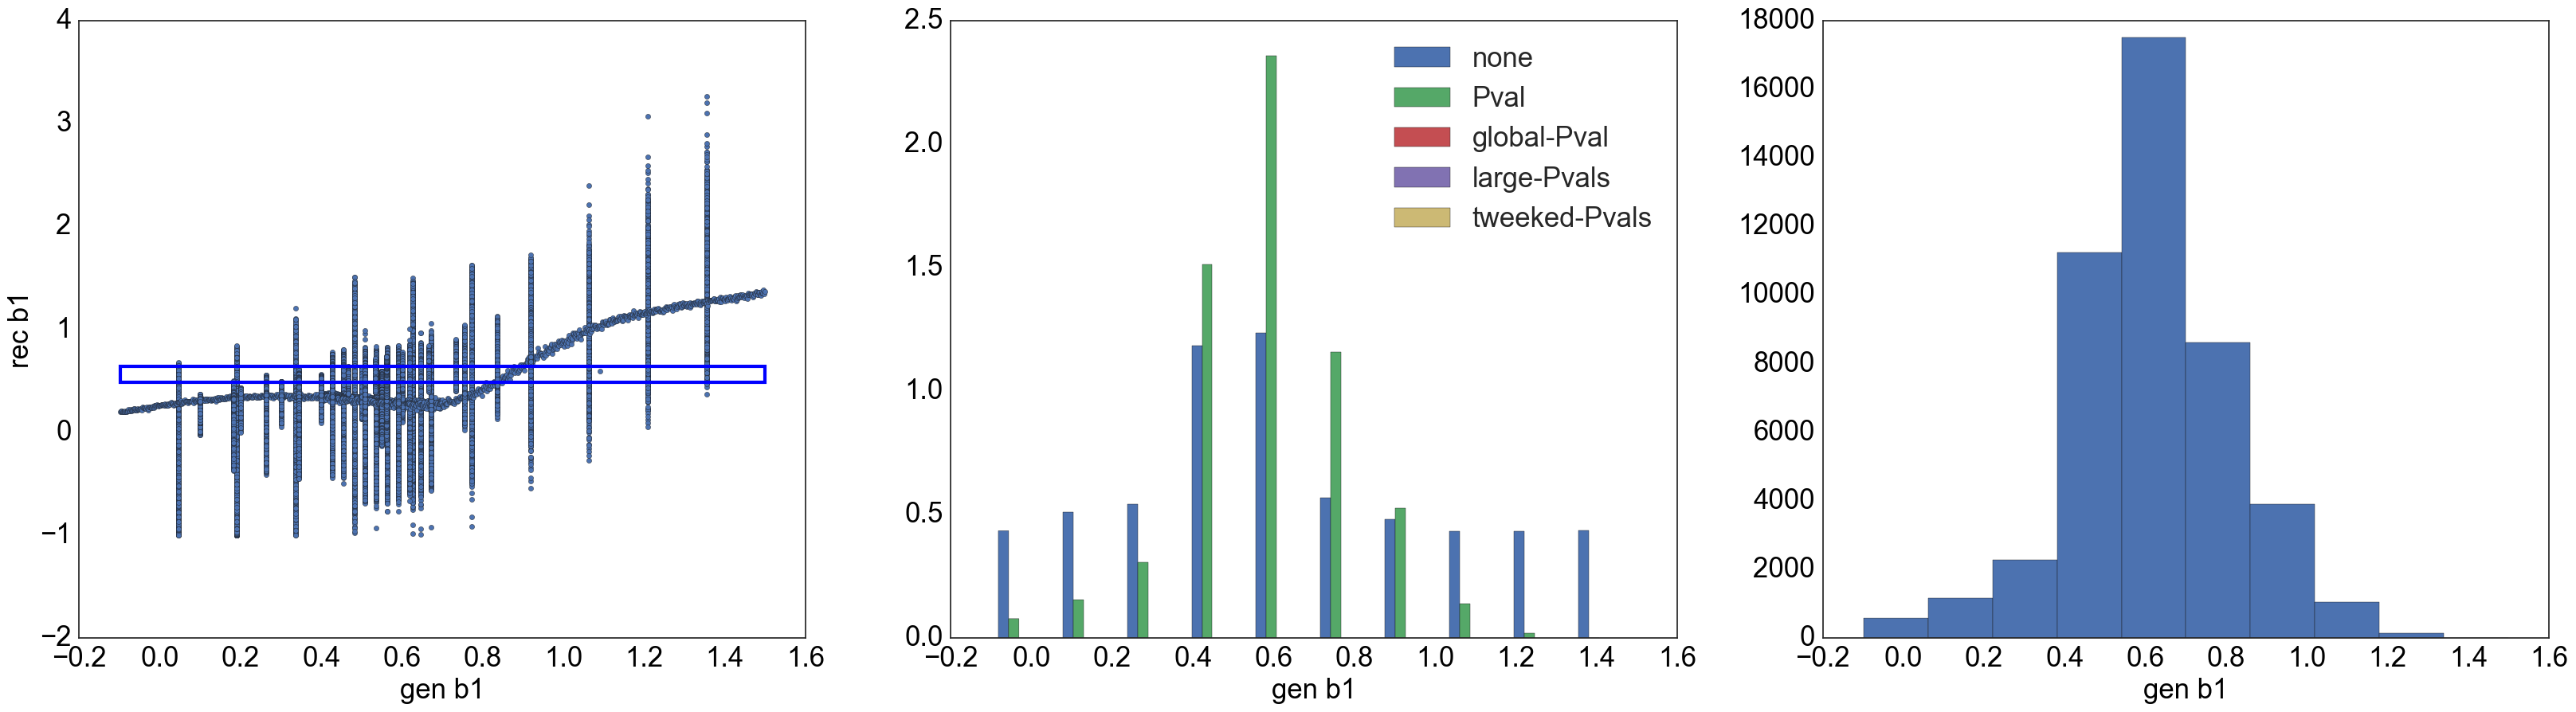

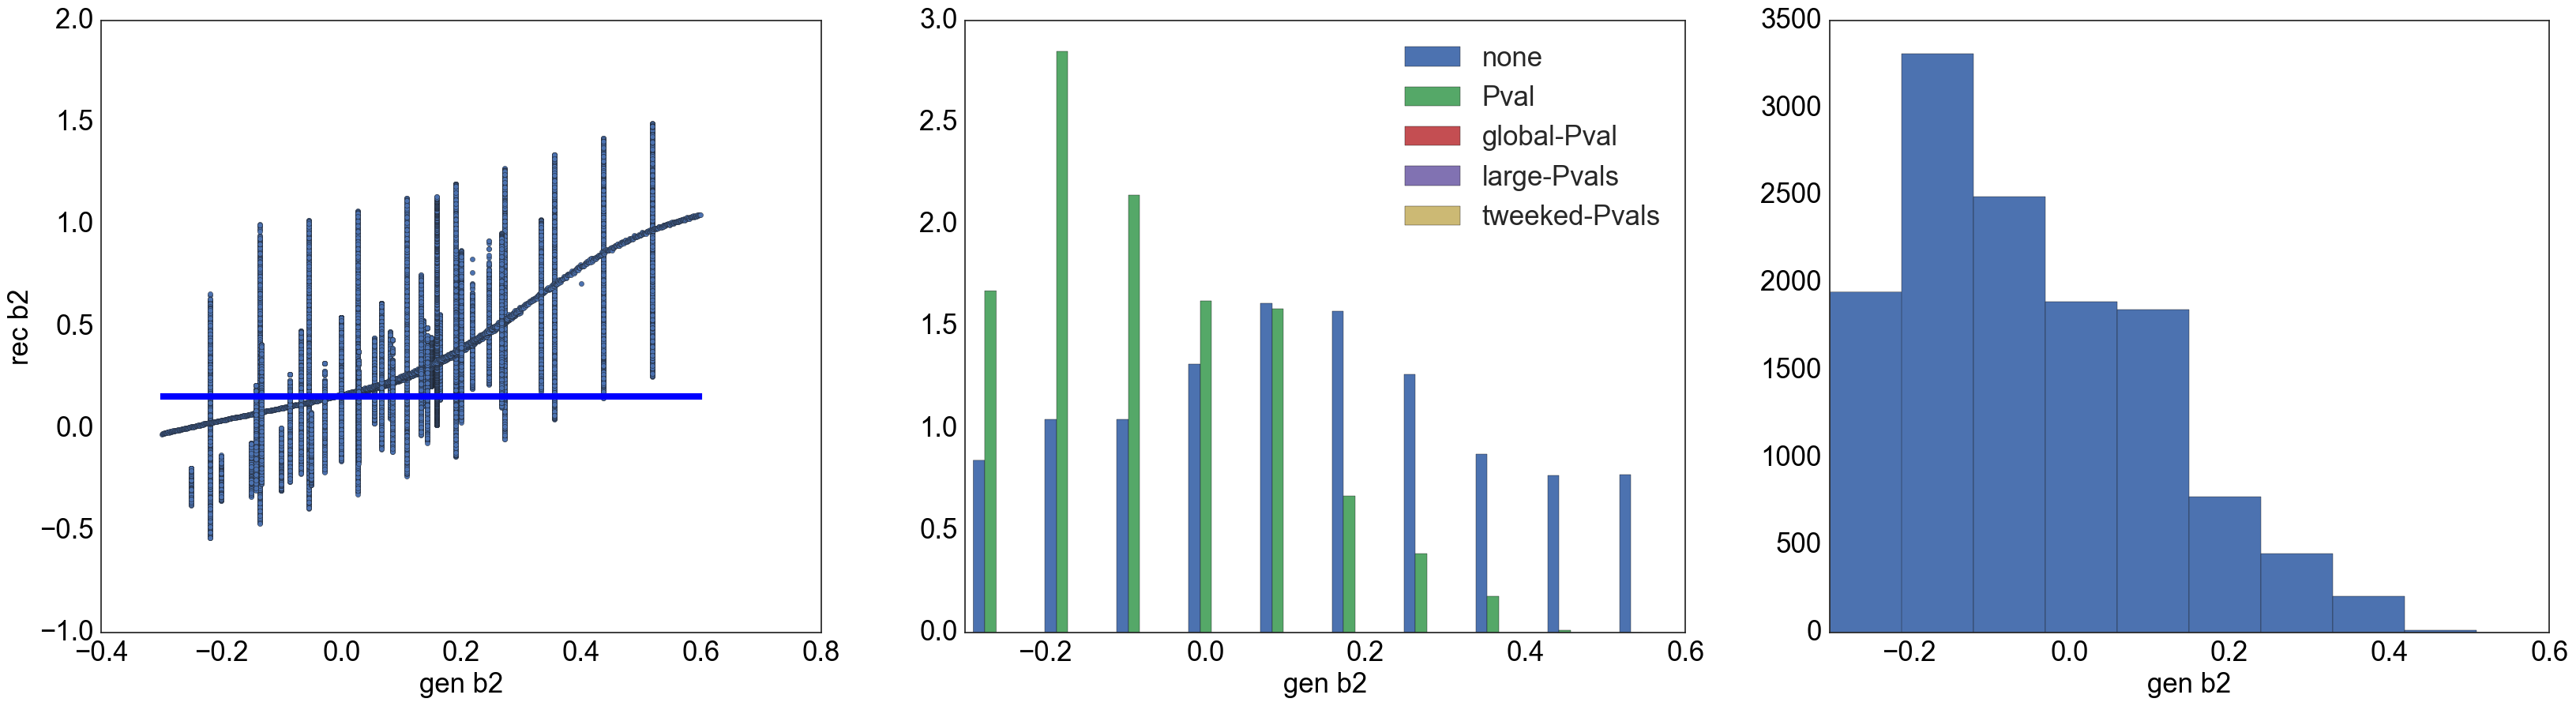

In [24]:
draw_single_parameter_gen_rec(sims=sims_all,var='SigmaZa1',name='a1')
draw_single_parameter_gen_rec(sims=sims_all,var='SigmaZa2',name='a2')
draw_single_parameter_gen_rec(sims=sims_all,var='MeanZa1',name='b1')
draw_single_parameter_gen_rec(sims=sims_all,var='MeanZa2',name='b2')

# read data

In [23]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1510000to1517776_results.csv',na_values=0.0)
sims.fillna(0,inplace=True)
PvalSigmaZa1_01 , PvalSigmaZa1_02 , PvalSigmaZa1_03  = [] , [] , []
for index,row in sims.iterrows():
    if index%50000==0: print index
    PvalSigmaZa1_01.append(Pval2varsAssumeGausDist(nom_vals['a1_C12'],0.1,row.recSigmaZa1_unweighted,0.1))
    PvalSigmaZa1_02.append(Pval2varsAssumeGausDist(nom_vals['a1_C12'],0.2,row.recSigmaZa1_unweighted,0.2))
    PvalSigmaZa1_03.append(Pval2varsAssumeGausDist(nom_vals['a1_C12'],0.3,row.recSigmaZa1_unweighted,0.3))


0
50000
100000
150000
200000
250000
300000


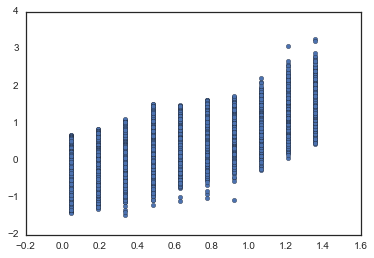

In [34]:
plt.scatter(sims[sims.recMeanZa1_unweighted>-20].genMeanZa1,sims[sims.recMeanZa1_unweighted>-20].recMeanZa1_unweighted)

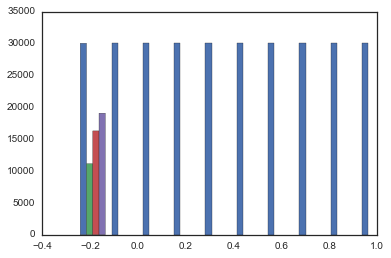

In [31]:
x = sims.genSigmaZa1
# print sims['PvalSigmaZa1'] 
x_array  =[x,x,x,x]
weights=[np.ones(len(x)),PvalSigmaZa1_01,PvalSigmaZa1_02,PvalSigmaZa1_03]
plt.hist(x_array,weights=weights);#,bins=np.linspace(0,1,10) );

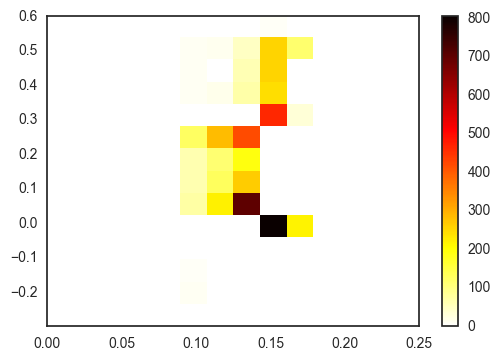

In [27]:
plt.hist2d(sims_all.genSigmaX,sims_all.genMeanZa2,weights=sims_all.PvalSigmaTSigmaZa1_12C,bins=(np.linspace(0,0.25,15),np.linspace(-0.3,0.6,15)),cmap='hot_r');
plt.colorbar()

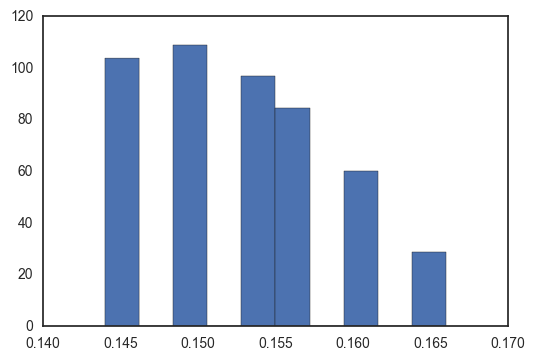

In [21]:
plt.hist(sims.genSigmaX,weights=FisherMethodPvals([sims.PvalSigmaX_unweighted_12C,sims.PvalSigmaZa1_tw_12C]));